## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

     ------------------------------------ 109.5/109.5 kB 632.0 kB/s eta 0:00:00


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [42]:
dataframe = np.load('data/average_ratings.npy')
dataframe

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

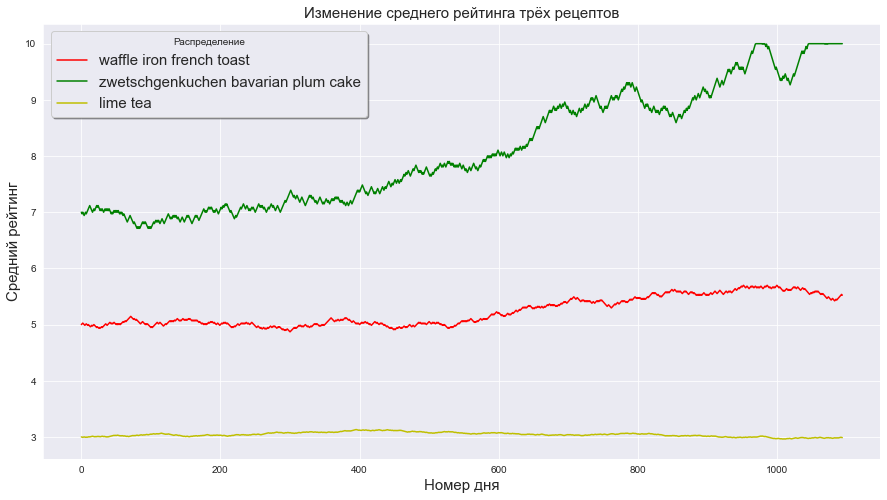

In [43]:
plt.figure(figsize=(15, 8))
plt.title("Изменение среднего рейтинга трёх рецептов", fontsize=15)
plt.plot(range(len(dataframe[0])), dataframe[0], 'r')
plt.plot(range(len(dataframe[1])), dataframe[1], 'g')
plt.plot(range(len(dataframe[2])), dataframe[2], 'y')
plt.xlabel("Номер дня", fontsize=15)
plt.ylabel("Средний рейтинг", fontsize=15)
plt.legend(labels=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'], title='Распределение',
           loc='best', shadow=True, fontsize=15)
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [44]:
date_all = pd.date_range(start='01.01.2019', end='30.12.2021')
date_all

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

<Figure size 432x288 with 0 Axes>

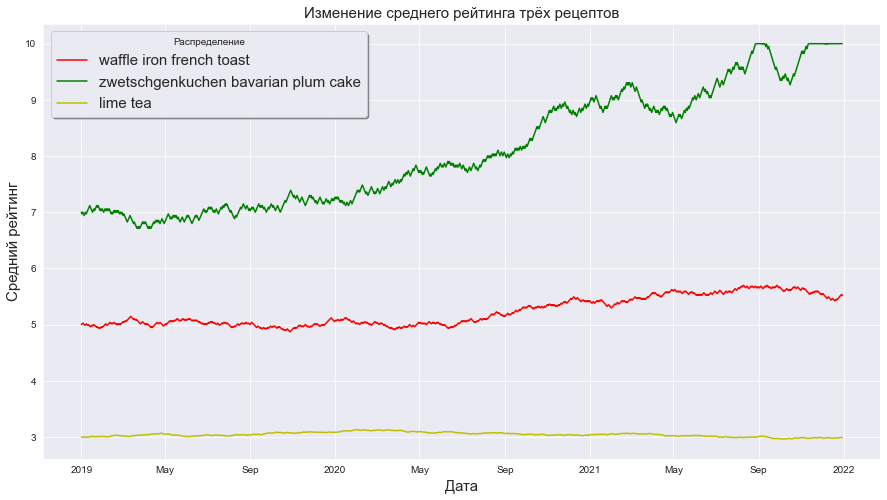

In [103]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 8))

colors = ['r', 'g', 'y']
for x in range(len(colors)):
    ax.plot(date_all, dataframe[x], colors[x])
ax.grid(True)
ax.set_xlabel('Дата', fontsize=15)
ax.set_ylabel('Средний рейтинг', fontsize=15)
ax.set_title("Изменение среднего рейтинга трёх рецептов", fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.legend(labels=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'], title='Распределение',
           loc='best', shadow=True, fontsize=15)
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

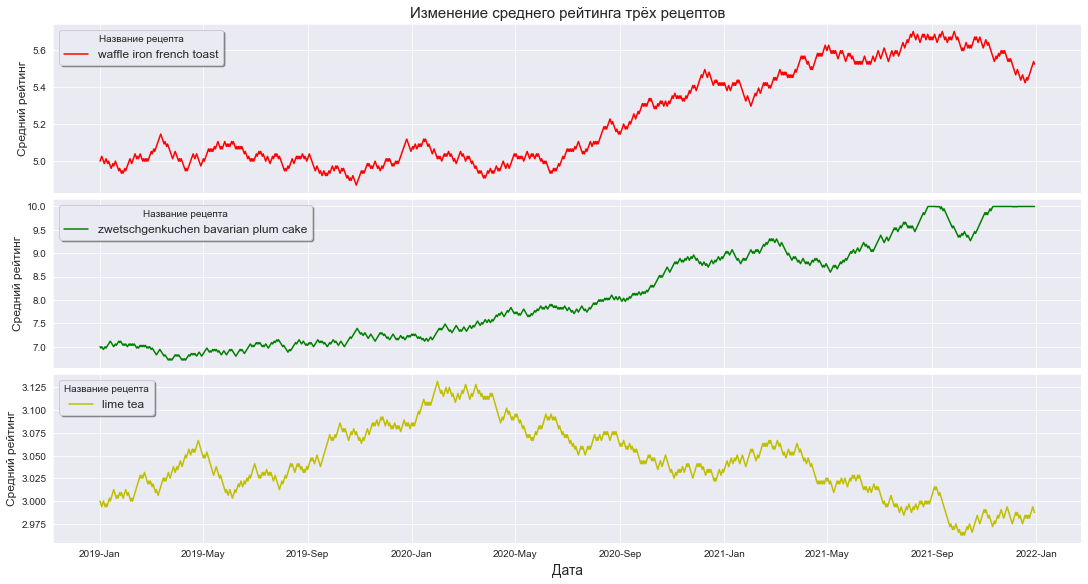

In [105]:
fig, axs = plt.subplots(3, 1, figsize=(15, 8), constrained_layout=True, sharex=True)

ind = 0
for ax in axs:
    ax.plot(date_all, dataframe[ind], colors[ind])
    ind += 1
    ax.set_ylabel('Средний рейтинг', fontsize=12)

# different formats:
ax = axs[0]
ax.set_title('Изменение среднего рейтинга трёх рецептов', fontsize=15)
ax.legend(['waffle iron french toast'], loc='upper left', shadow=True, fontsize=12, title="Название рецепта")
ax.set_xticklabels([])

ax = axs[1]
ax.legend(['zwetschgenkuchen bavarian plum cake'], loc='upper left', shadow=True, fontsize=12, title="Название рецепта")
ax.set_xticklabels([])

ax = axs[2]
ax.legend(['lime tea'], loc='upper left', fontsize=12, shadow=True, title="Название рецепта")
ax.set_xlabel('Дата', fontsize=14)

# Text in the axis x will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [65]:
visit_data = np.load('data/visitors.npy')
visit_data

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

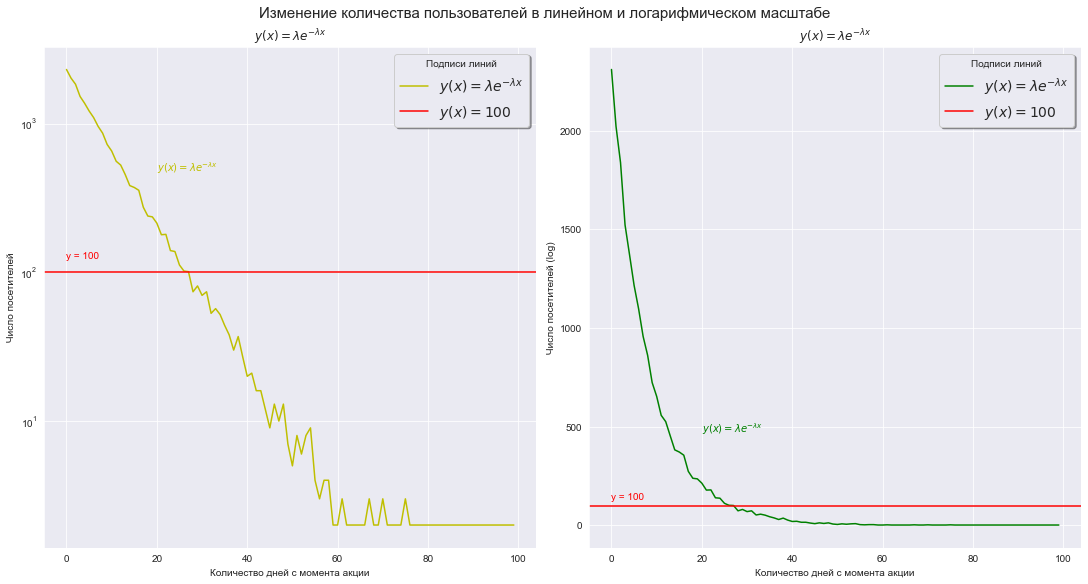

In [149]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)

ind, colors = 0, ['y', 'g']
for ax in axs:
    ax.plot(visit_data, colors[ind])
    ax.axhline(y = 100, color = 'r', linestyle = '-')
    ax.text(0, 120, "y = 100", color = 'red', ha = 'left', va = 'bottom')
    ax.text(20, 450, "$y(x)=\lambda e^{-\lambda x}$", color = colors[ind], ha = 'left', va = 'bottom')
    ax.title.set_text('$y(x)=\lambda e^{-\lambda x}$')
    ind += 1

# different formats:
ax = axs[0]
ax.legend(labels=['$y(x)=\lambda e^{-\lambda x}$', '$y(x)=100$'], loc='best', shadow=True, fontsize=14, title="Подписи линий")
ax.set_yscale('log')
ax.set_xlabel("Количество дней с момента акции")
ax.set_ylabel("Число посетителей")

ax = axs[1]
ax.legend(labels=['$y(x)=\lambda e^{-\lambda x}$', '$y(x)=100$'], loc='best', shadow=True, fontsize=14, title="Подписи линий")
ax.set_xlabel('Количество дней с момента акции')
ax.set_ylabel("Число посетителей (log)")

fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=15)
plt.show()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [2]:
reviews = pd.DataFrame(pd.read_csv('data/reviews_sample.csv'))
recipes = pd.DataFrame(pd.read_csv('data/recipes_sample.csv'))
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [3]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [4]:
recipes_short = recipes[recipes['minutes'] < 5]
recipes_aver = recipes[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50)]
recipes_long = recipes[recipes['minutes'] >= 50]

recipes_short['type'] = 'short'
recipes_aver['type'] = 'aver'
recipes_long['type'] = 'long'

df = pd.concat([recipes_short, recipes_aver, recipes_long])
df.sort_index(inplace=True)
df

C:\Users\admin\AppData\Local\Temp/ipykernel_10832/22321061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_short['type'] = 'short'
C:\Users\admin\AppData\Local\Temp/ipykernel_10832/22321061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_aver['type'] = 'aver'
C:\Users\admin\AppData\Local\Temp/ipykernel_10832/22321061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,aver
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,aver
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,aver
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,aver
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,long
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,long
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,long
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,long


In [5]:
short_count = int(recipes_short.describe()['id']['count'])
aver_count = int(recipes_aver.describe()['id']['count'])
long_count = int(recipes_long.describe()['id']['count'])

print("Коротких рецептов: " + str(short_count))
print("Средних рецептов: " + str(aver_count))
print("Длинных рецептов: " + str(long_count))

Коротких рецептов: 675
Средних рецептов: 17607
Длинных рецептов: 11718


In [6]:
short_steps = recipes_short['n_steps'].sum(axis=0) / len(recipes_short)
aver_steps = recipes_aver['n_steps'].sum(axis=0) / len(recipes_aver)
long_steps = recipes_long['n_steps'].sum(axis=0) / len(recipes_long)

print("Среднее количество шагов у коротких рецептов = " + str(round(short_steps, 6)))
print("Среднее количество шагов у средних рецептов = " + str(round(aver_steps, 6)))
print("Среднее количество шагов у длинных рецептов = " + str(round(long_steps, 6)))

Среднее количество шагов у коротких рецептов = 3.09037
Среднее количество шагов у средних рецептов = 5.381553
Среднее количество шагов у длинных рецептов = 7.47602


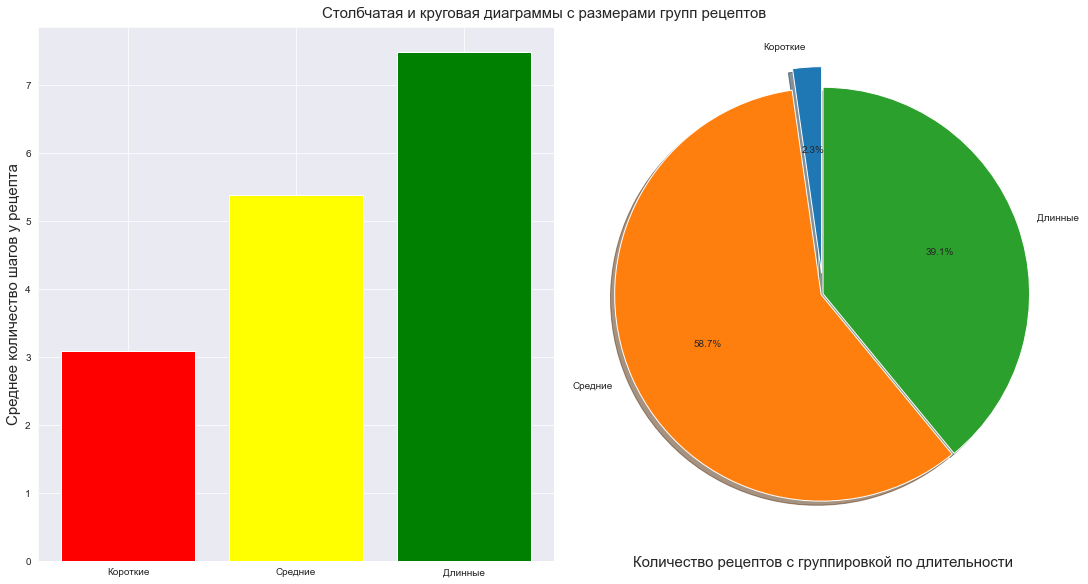

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)

ax = axs[0]
x, y = ["Короткие", "Средние", "Длинные"], [short_steps, aver_steps, long_steps]
ax.bar(x, y, color=['red', 'yellow', 'green'])
ax.set_ylabel("Среднее количество шагов у рецепта", fontsize=15)

ax = axs[1]
y = [short_count, aver_count, long_count]
ax.pie(y, [0.1, 0.01, 0], x, shadow=True, autopct='%1.1f%%', startangle=90)
ax.set_xlabel('Количество рецептов с группировкой по длительности', fontsize=15)

fig.suptitle("Столбчатая и круговая диаграммы с размерами групп рецептов", fontsize=15)
plt.show()

Text(0, 0.5, 'Количество рецептов с группировкой по длительности')

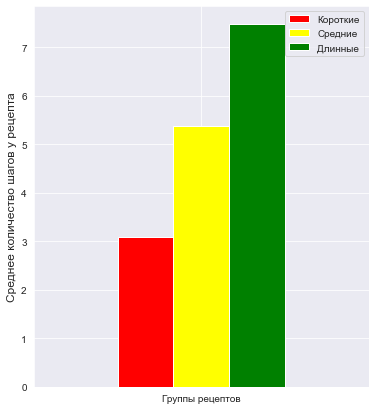

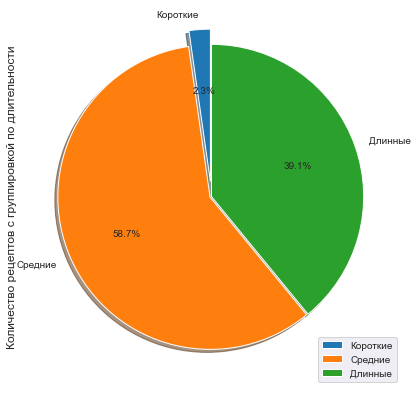

In [38]:
df_one = pd.DataFrame({"Короткие": short_steps, "Средние": aver_steps, "Длинные": long_steps}, index=['Группы рецептов'])
df_two = pd.DataFrame({'names': ["Короткие", "Средние", "Длинные"], 'values': [short_count, aver_count, long_count]})
df_two.set_index('names', inplace=True)

axs = df_one.plot.bar(figsize=(6, 7), rot=0, color=['red', 'yellow', 'green'])
axs.set_ylabel("Среднее количество шагов у рецепта", fontsize=12)

axs = df_two.plot.pie(y='values', figsize=(7, 7), autopct='%1.1f%%', startangle=90, explode=[0.1, 0.01, 0], shadow=True)
axs.set_ylabel('Количество рецептов с группировкой по длительности', fontsize=12)

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

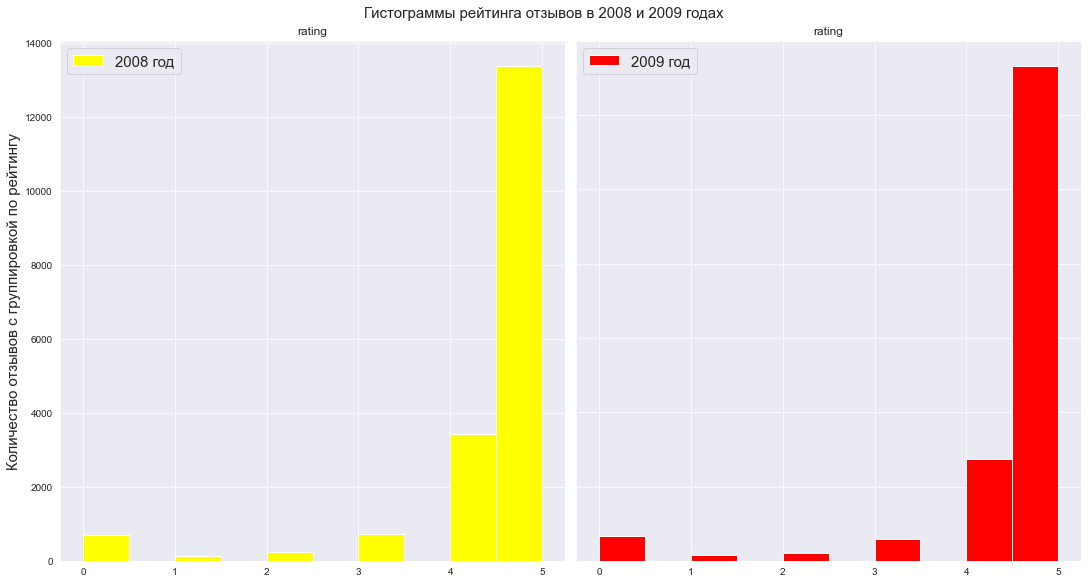

In [132]:
dataframe = reviews.loc[(reviews['date'] > '2007-12-31') & (reviews['date'] < '2010-01-01')]

df_one = dataframe.loc[(dataframe['date'] > '2007-12-31') & (dataframe['date'] < '2009-01-01')]
df_two = dataframe.loc[(dataframe['date'] > '2008-12-31') & (dataframe['date'] < '2010-01-01')]

fig, axs = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)
first, second = df_one.hist(column='rating', ax=axs[0], color='yellow'), df_two.hist(column='rating', ax=axs[1], color='red')

axs[0].set_ylabel("Количество отзывов с группировкой по рейтингу", fontsize=15)
axs[0].legend(['2008 год'], loc='upper left', fontsize=15)
axs[1].legend(['2009 год'], loc='upper left', fontsize=15)
axs[1].set_yticklabels([])

plt.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах", fontsize=15)
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<AxesSubplot:xlabel='n_steps', ylabel='n_ingredients'>

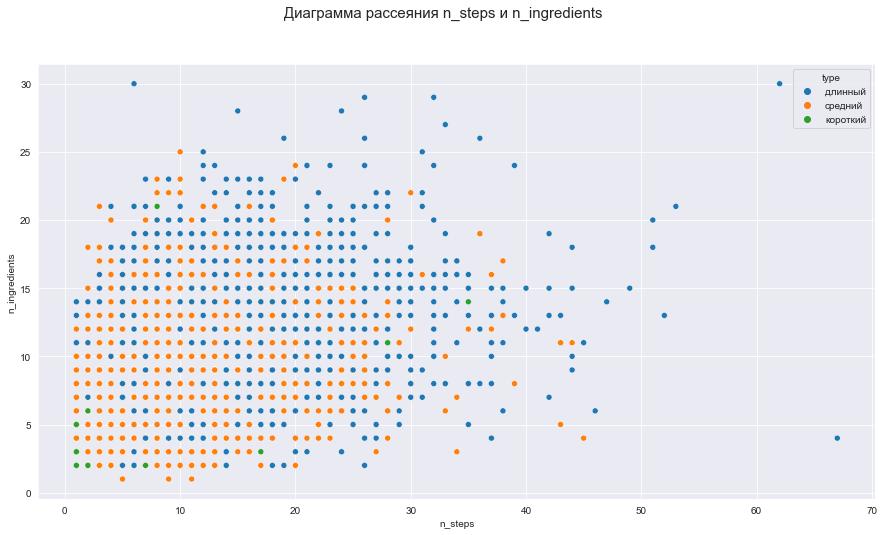

In [137]:
plt.figure(figsize=(15, 8))
plt.suptitle('Диаграмма рассеяния n_steps и n_ingredients', fontsize=15)

recipes['type'] = "средний"
recipes.loc[recipes.minutes < 5, 'type'] = "короткий"
recipes.loc[recipes.minutes >= 50, 'type'] = "длинный"

sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="type")

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

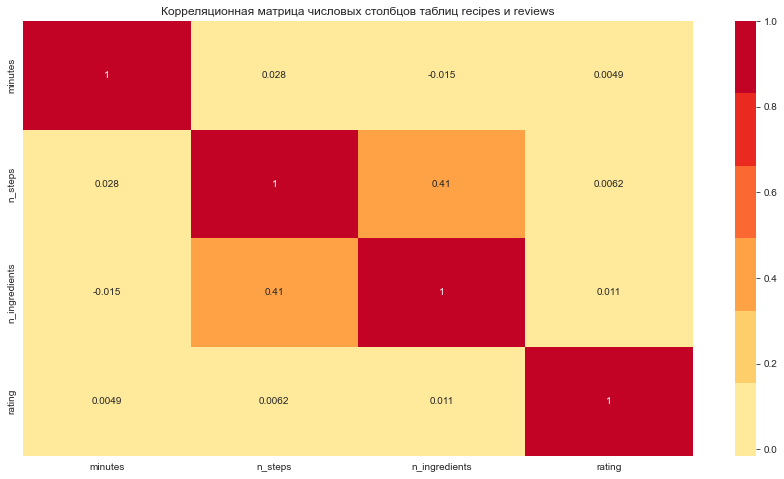

In [140]:
united = recipes.join(reviews)
corr_n = united[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

plt.figure(figsize=(15, 8))
ax0 = plt.axes()
sns.heatmap(corr_n, ax=ax0, cmap=sns.color_palette('YlOrRd'), annot=True).set_title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")